In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

In [2]:
import torchvision.transforms as transforms
batch_size =128
trainset = torchvision.datasets.MNIST(root='./data', train=True, download =True, transform = transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size =batch_size, shuffle=True)


testset = torchvision.datasets.MNIST(root='./data', train=False, download =True, transform = transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size =batch_size, shuffle=False)

In [3]:
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import torch.nn as nn

class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cnn_model = nn.Sequential(
        nn.Conv2d(1, 6, 5), # (N, 1, 28, 28) -> (N, 6, 24, 24 ) 
        # N - Number of batches. 1 -single channel , 6 - 6 channel, 5 - Filter size
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2), # (N,6, 24, 24) -> (N, 6, 12, 12)
        nn.Conv2d(6, 16, 5), # (N, 6, 12, 12) -> (N, 16,8, 8 )
        nn.Tanh(),
        nn.AvgPool2d(2, stride =2) #(N, 16, 8,8) -> (N, 16, 4,4)

    )
        self.fc_model = nn.Sequential(
        nn.Linear(256, 120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )

    def forward(self,x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [0]:
model = ConvNet()

In [245]:
model

ConvNet(
  (cnn_model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [0]:
learning_rate = 0.001
criterian = nn.CrossEntropyLoss()

In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr =learning_rate)

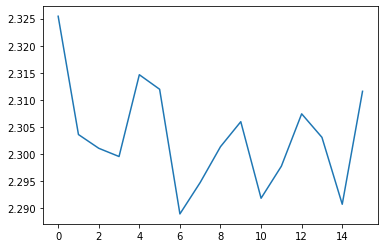

CPU times: user 2min 38s, sys: 699 ms, total: 2min 39s
Wall time: 2min 39s


In [249]:


%%time
loss_arr = []
loss_epochs_arr = []

for epoch in range(16):
    
    for i, data in enumerate(trainloader, 0):
     inputs, labels =data
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterian(outputs, labels)
    optimizer.step()

    loss_arr.append(loss.item())
    #print(loss.item())

  loss_epochs_arr.append(loss.item())
  

#print(loss[-1])
plt.plot(loss_epochs_arr)
plt.show()

